In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
Data = pd.read_csv('gaz.csv', dtype={'INSEE':str}, index_col='INSEE')

In [2]:
co2=Data.select_dtypes('float64')
co2.drop(columns=['latitude','longitude'], inplace=True)

In [3]:
co2.describe()

,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire
count,35727.000000,9978.000000,2.891000e+03,35789.000000,35783.000000,3.448800e+04,3.448800e+04,35783.000000,35770.000000,35789.000000
mean,2460.268448,654.983149,7.692345e+03,1774.521820,410.896773,6.625899e+02,2.423214e+03,1783.888791,3535.827835,1105.248726
std,2927.247535,9233.277367,1.137643e+05,7872.266877,4122.986976,2.645648e+04,5.670538e+04,8916.982999,9664.166800,5164.790953
min,0.003432,0.000204,3.972950e-04,3.758088,0.132243,2.354558e+00,1.052998e+00,1.027266,0.555092,0.000000
25%,797.739016,52.569620,1.005097e+01,197.963177,25.655166,2.354558e+00,6.911213e+00,96.064709,419.720210,94.749885
50%,1559.581679,106.813577,1.992434e+01,424.944077,54.748653,4.709115e+00,1.382243e+01,227.099964,1070.895593,216.297718
75%,3008.684900,237.404560,3.298311e+01,1094.640370,110.821153,5.180027e+01,1.520467e+02,749.472104,3097.978870,576.155869
max,98949.317760,513140.971691,3.303394e+06,576394.181208,275500.374439,2.535858e+06,6.765119e+06,410675.902028,586054.672836,288175.400126


In [4]:
# Data['Déchets'].fillna(Data['Déchets'].mean(), inplace=True)

In [5]:
data_non_nan = Data.dropna(subset=['Déchets'])
Data['bacs'] = pd.cut(data_non_nan['Déchets'], bins=30, labels=False)

In [6]:
Data["bacs"].shape

(35789,)

In [7]:
Data['bacs'].value_counts().sort_values(ascending=True)

bacs
15.0        1
24.0        1
20.0        1
29.0        1
13.0        1
12.0        1
10.0        2
18.0        2
11.0        3
9.0         3
8.0         4
7.0         9
6.0        10
5.0        11
4.0        20
3.0        28
2.0        69
1.0       157
0.0     35459
Name: count, dtype: int64

<Axes: xlabel='Déchets', ylabel='Count'>

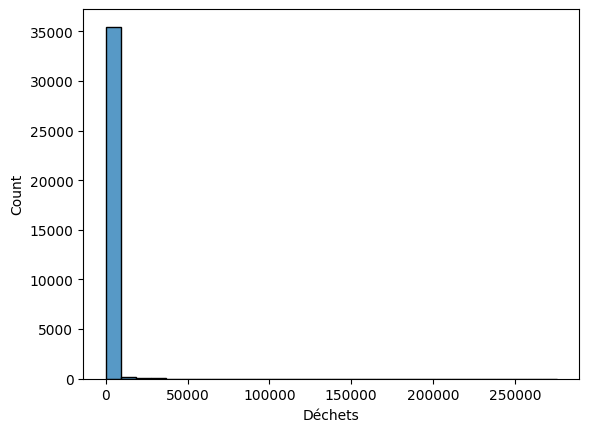

In [8]:
sns.histplot(Data['Déchets'], bins=30)

<Axes: xlabel='longitude', ylabel='latitude'>

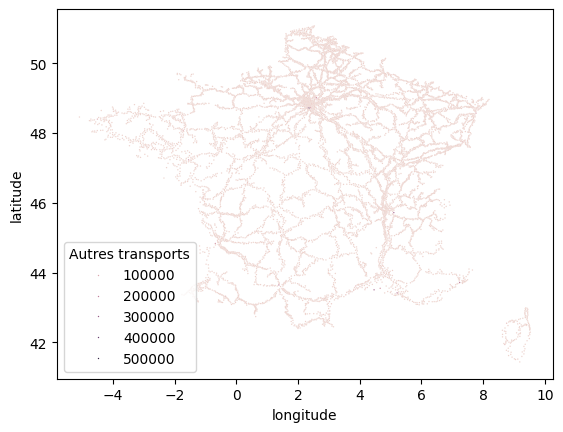

In [9]:
data_non_nan = Data.dropna(subset=['Autres transports'])
Data['bacs']=pd.cut(data_non_nan['Autres transports'], bins=30, labels=False)
sns.scatterplot(data=Data, x='longitude', y='latitude', hue='Autres transports', s=1)

<Axes: >

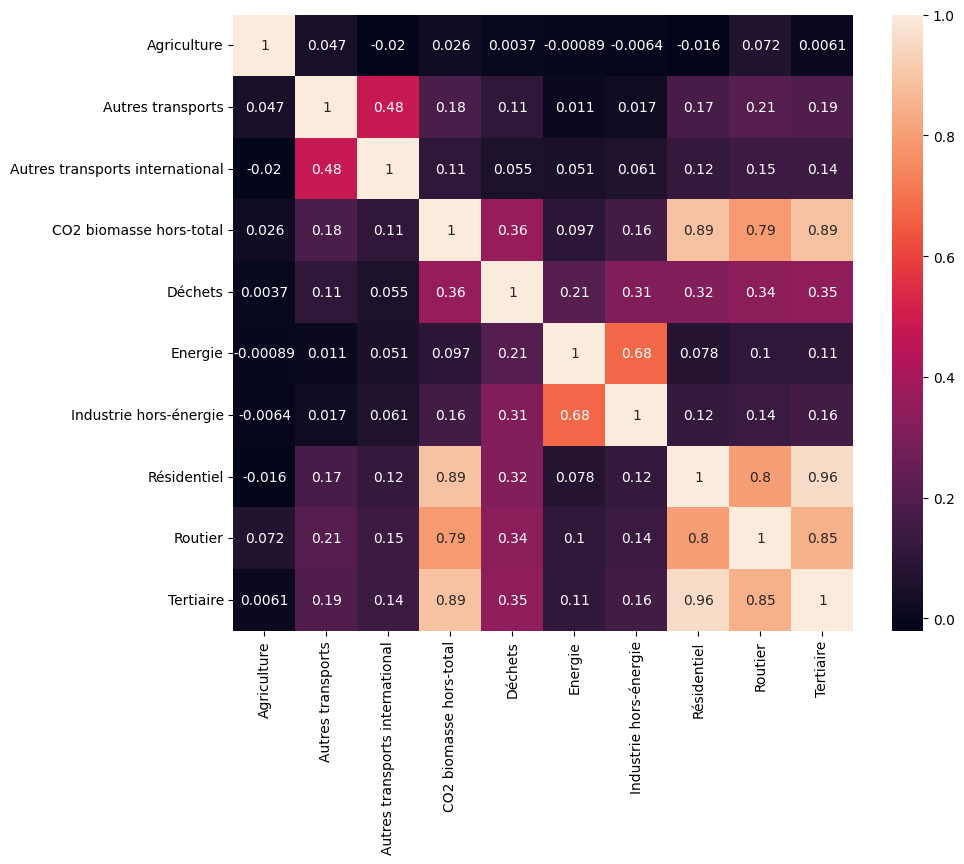

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(co2.corr(), annot=True)

In [11]:
co2.describe()

,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire
count,35727.000000,9978.000000,2.891000e+03,35789.000000,35783.000000,3.448800e+04,3.448800e+04,35783.000000,35770.000000,35789.000000
mean,2460.268448,654.983149,7.692345e+03,1774.521820,410.896773,6.625899e+02,2.423214e+03,1783.888791,3535.827835,1105.248726
std,2927.247535,9233.277367,1.137643e+05,7872.266877,4122.986976,2.645648e+04,5.670538e+04,8916.982999,9664.166800,5164.790953
min,0.003432,0.000204,3.972950e-04,3.758088,0.132243,2.354558e+00,1.052998e+00,1.027266,0.555092,0.000000
25%,797.739016,52.569620,1.005097e+01,197.963177,25.655166,2.354558e+00,6.911213e+00,96.064709,419.720210,94.749885
50%,1559.581679,106.813577,1.992434e+01,424.944077,54.748653,4.709115e+00,1.382243e+01,227.099964,1070.895593,216.297718
75%,3008.684900,237.404560,3.298311e+01,1094.640370,110.821153,5.180027e+01,1.520467e+02,749.472104,3097.978870,576.155869
max,98949.317760,513140.971691,3.303394e+06,576394.181208,275500.374439,2.535858e+06,6.765119e+06,410675.902028,586054.672836,288175.400126


In [12]:
co2.fillna(0, inplace=True)
co2.isna().sum()

Agriculture                        0
Autres transports                  0
Autres transports international    0
CO2 biomasse hors-total            0
Déchets                            0
Energie                            0
Industrie hors-énergie             0
Résidentiel                        0
Routier                            0
Tertiaire                          0
dtype: int64

In [13]:
co2 = co2 + 1.5


In [14]:
co2 = np.log(co2)
co2.describe()

,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire
count,35789.000000,35789.000000,35789.000000,35789.000000,35789.000000,35789.000000,35789.000000,35789.000000,35789.000000,35789.000000
mean,7.245596,1.606993,0.632671,6.238816,4.085369,2.730301,3.644074,5.716133,7.062348,5.567578
std,1.239944,2.050175,0.906846,1.337011,1.201076,1.961109,2.205626,1.604389,1.453184,1.441907
min,0.405465,0.405465,0.405465,1.659767,0.405465,0.405465,0.405465,0.405465,0.405465,0.405465
25%,6.678874,0.405465,0.405465,5.295630,3.301567,1.349256,2.129566,4.580281,6.042054,4.566948
50%,7.350389,0.405465,0.405465,6.055481,4.029782,1.349256,2.129566,5.431701,6.976798,5.383567
75%,8.008569,3.299550,0.405465,6.999551,4.721360,3.883442,4.939671,6.621189,8.038163,6.358978
max,11.502378,13.148309,15.010461,13.264550,12.526350,14.746043,15.727291,12.925563,13.281171,12.571330


<Axes: xlabel='Déchets', ylabel='Count'>

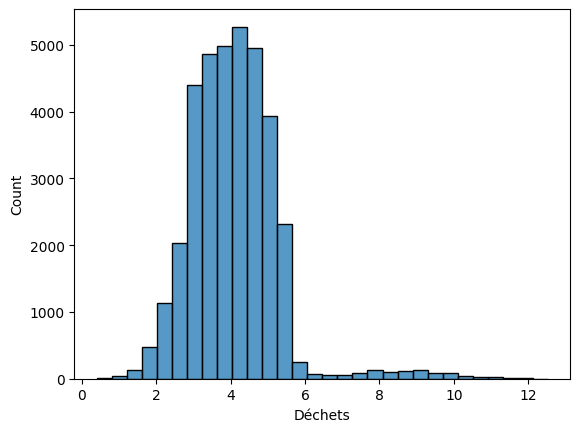

In [15]:
sns.histplot(co2['Déchets'], bins=30)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = co2.drop(['Résidentiel'], axis=1)
y = co2['Résidentiel']


In [17]:
model.fit(x,y)
ypred = model.predict(x)
model.score(x,y)


0.9369785630916064

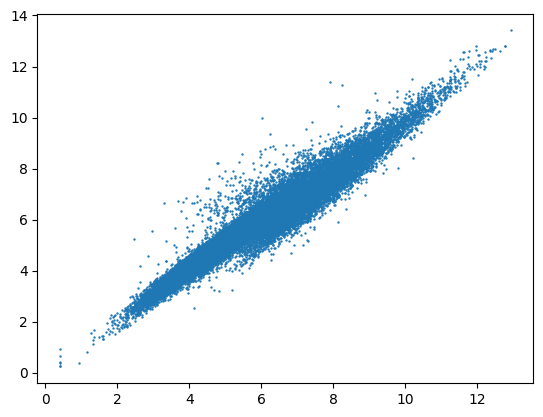

In [18]:
plt.scatter(x=y, y=ypred, s=0.5)

In [19]:
co2

,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire
INSEE,,,,,,,,,,
01001,8.219576,0.405465,0.405465,6.073625,4.634054,1.349256,2.129566,5.739337,6.677910,5.909539
01002,6.167160,0.405465,0.405465,4.957527,4.957062,1.349256,2.129566,4.666890,5.859355,4.740000
01004,6.215695,5.366340,0.405465,9.241349,8.578442,6.907588,7.983390,9.718261,9.657838,9.281160
01005,7.528687,0.405465,0.405465,7.043971,5.383198,4.561033,5.627436,6.500062,7.471842,6.664287
01006,6.110284,0.405465,0.405465,4.363530,3.910052,0.405465,0.405465,3.811407,5.992181,3.973715
...,...,...,...,...,...,...,...,...,...,...
95676,7.396068,0.405465,0.405465,5.115268,4.198158,2.585716,3.585075,5.179523,5.740204,5.467803
95678,6.551267,0.405465,0.405465,7.194907,4.727219,1.349256,2.129566,7.242104,9.839529,6.003652
95680,4.691944,0.405465,0.405465,9.032251,5.425491,6.284105,7.359051,10.026383,9.410716,9.536114
